## **Identificación De Especies de Mosquitos - Data Science**

Carol Arévalo, Stefano Aragoni, Luis Santos, Diego Perdomo

### *Análisis Exploratorio*

El Ministerio de Salud y Asistencia Social (MSPAS) ha informado que Guatemala ha experimentado un aumento significativo en el número de casos de dengue en 2023, con más de 10,000 casos confirmados y 21 muertes hasta el 12 de agosto. El MSPAS ha declarado una alerta epidemiológica en todo el país para combatir la propagación del dengue (Gobierno De Guatemala, 2023).  


Con esto en mente, el presente proyecto busca utilizar técnicas de procesamiento de imágenes y aprendizaje automático para identificar la especie de mosquito Aedes aegypti a partir de imágenes, con el fin de apoyar los esfuerzos de prevención del dengue en Guatemala.


----------

#### Librerías

Como primer paso, se importan las librerías necesarias para el desarrollo del proyecto.

In [6]:
# Liberias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from PIL import Image
import numpy as np
import os

----------

#### Cargar Datos

Posteriormente, se cargaron los datos de las imágenes de los mosquitos e información adicional sobre las mismas.

- En este caso, `phase2_train_v0.csv` contiene información de las imagenes; incluyendo su tamaño, el tamaño del bounding box y la especie del mosquito.

- Por otro lado, en la carpeta `final` se encuentran las imágenes de los mosquitos.

In [8]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('phase2_train_v0.csv')


In [9]:
# Cargar todas las imagenes de la carpeta final
pictures = []

for i in os.listdir('final'):
    pictures.append(Image.open('final/'+i))

----------

#### Datos (Variables, Observaciones)

Como se puede observar a continuación, el dataset de `phase2_train_v0.csv` contiene 8 variables. Asimismo, se tienen 10,357 datos de distintas imágenes de mosquitos.

Las variables de este dataset son las siguientes:
1. **img_fName**
    - Nombre de la imagen
    - Categórica
2. **img_w**
    - Ancho de la imagen
    - Cuantitativa Discreta
3. **img_h**
    - Alto de la imagen
    - Cuantitativa Discreta
4. **bbx_xtl**
    - Coordenada x del punto superior izquierdo del bounding box
    - Cuantitativa Discreta
5. **bbx_ytl**
    - Coordenada y del punto superior izquierdo del bounding box
    - Cuantitativa Discreta
6. **bbx_xbr**
    - Coordenada x del punto inferior derecho del bounding box
    - Cuantitativa Discreta
7. **bbx_ybr**
    - Coordenada y del punto inferior derecho del bounding box
    - Cuantitativa Discreta
8. **class_label**
    - Especie del mosquito
    - Categórica

In [11]:
# Mostrar los primeros registros del DataFrame
print(data.shape)

data.head(10)

(10357, 8)


,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label
0,train_00000.jpeg,2448,3264,1301,1546,1641,2096,albopictus
1,train_00001.jpeg,3024,4032,900,1897,1950,2990,albopictus
2,train_00002.jpeg,768,1024,220,58,659,808,albopictus
3,train_00003.jpeg,3456,4608,1169,2364,1586,2826,albopictus
4,train_00004.jpeg,1024,1365,129,231,697,1007,culex
5,train_00005.jpeg,1152,2560,198,798,954,1351,albopictus
6,train_00006.jpeg,3072,4080,1104,1030,2458,2911,anopheles
7,train_00007.jpeg,2128,4608,248,728,2049,1992,albopictus
8,train_00008.jpeg,4000,2250,1768,899,2414,1591,albopictus
9,train_00009.jpeg,768,1024,180,140,683,744,albopictus


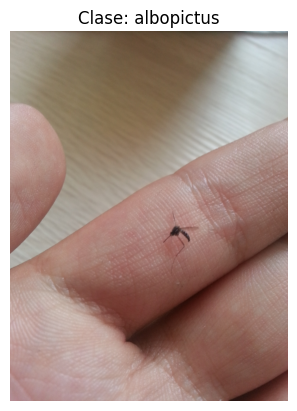

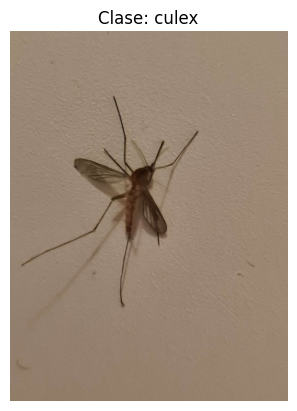

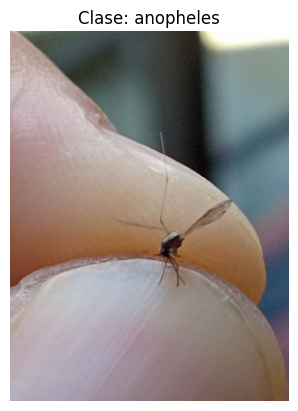

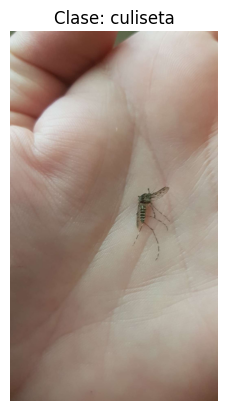

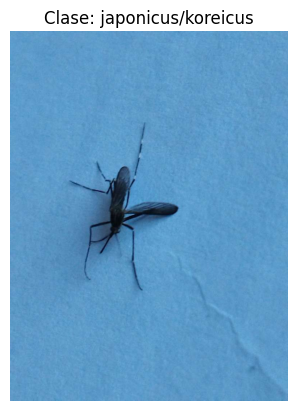

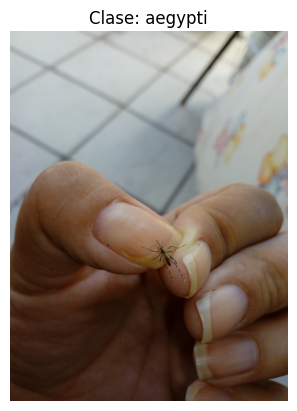

In [41]:
# Obtener las clases únicas en el conjunto de datos
unique_classes = data['class_label'].unique()

# Definir las dimensiones de la cuadrícula
num_rows = len(unique_classes) // 3 + 1
num_cols = 3

# Crear una figura y ejes para la cuadrícula
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Recorrer las clases y mostrar la primera imagen de cada una en la cuadrícula
for i, class_label in enumerate(unique_classes):
    # Filtrar las filas correspondientes a la clase actual
    class_data = data[data['class_label'] == class_label]
    
    # Obtener el nombre del primer archivo de imagen de la clase actual
    first_image_name = class_data.iloc[0]['img_fName']
    
    # Cargar la imagen utilizando PIL (Python Imaging Library)
    image_path = 'final/' + first_image_name  # Ajusta la ruta según tus datos
    img = Image.open(image_path)
    
    # Calcular la fila y la columna en la cuadrícula
    row = i // num_cols
    col = i % num_cols
    
    # Mostrar la imagen en la subtrama correspondiente
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'Clase: {class_label}')
    axes[row, col].axis('off')  # Para ocultar los ejes

# Ocultar cualquier subtrama vacía
for i in range(len(unique_classes), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Ajustar automáticamente el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la cuadrícula de imágenes
plt.show()


----------

In [42]:
# Identificar columnas con datos faltantes
missing_data = data.isnull().sum()
print(missing_data)

img_fName      0
img_w          0
img_h          0
bbx_xtl        0
bbx_ytl        0
bbx_xbr        0
bbx_ybr        0
class_label    0
dtype: int64


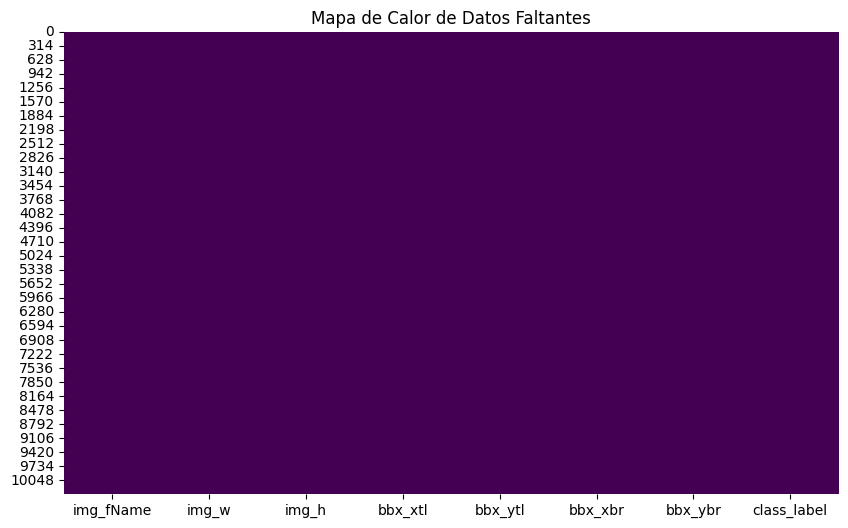

In [43]:
# Crear un mapa de calor de datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

Como se puede observar no se tienen datos nulos o faltantes por lo que no fue necesario realizar ningun tipo de limpieza de datos inicial. 

In [18]:
# Obtener información general sobre el DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_fName    10357 non-null  object
 1   img_w        10357 non-null  int64 
 2   img_h        10357 non-null  int64 
 3   bbx_xtl      10357 non-null  int64 
 4   bbx_ytl      10357 non-null  int64 
 5   bbx_xbr      10357 non-null  int64 
 6   bbx_ybr      10357 non-null  int64 
 7   class_label  10357 non-null  object
dtypes: int64(6), object(2)
memory usage: 647.4+ KB
None


In [44]:
# Resumen estadístico de las columnas numéricas
print(data.describe())

              img_w         img_h       bbx_xtl       bbx_ytl       bbx_xbr  \
count  10357.000000  10357.000000  10357.000000  10357.000000  10357.000000   
mean    2039.716327   2470.491165    666.901323    887.978372   1330.077532   
std     1174.279458   1357.607784    512.356341    645.361851    793.412874   
min      139.000000    106.000000      0.000000      0.000000    128.000000   
25%     1024.000000   1109.000000    276.000000    394.000000    640.000000   
50%     1844.000000   2208.000000    502.000000    677.000000   1154.000000   
75%     3024.000000   4000.000000    987.000000   1349.000000   1880.000000   
max     9280.000000  12000.000000   3977.000000   5459.000000   7327.000000   

            bbx_ybr  
count  10357.000000  
mean    1565.666699  
std      903.075535  
min       85.000000  
25%      761.000000  
50%     1337.000000  
75%     2304.000000  
max     7601.000000  


Los datos son un conjunto de datos tabulares en formato CSV con información sobre mosquitos. A continuación se muestra una descripción de cada columna y su tipo de datos típico en Python:

- img_fName: Esta columna contiene el nombre de archivo de una imagen. El tipo de datos es una cadena (string).

- img_w: Representa el ancho de la imagen en píxeles. El tipo de datos es un número entero (int).

- img_h: Representa la altura de la imagen en píxeles. El tipo de datos es un número entero (int).

- bbx_xtl: Esto es la coordenada x del punto superior izquierdo del cuadro delimitador (bounding box) alrededor de un objeto en la imagen. El tipo de datos es un número entero (int).

- bbx_ytl: Esto es la coordenada y del punto superior izquierdo del cuadro delimitador alrededor de un objeto en la imagen. El tipo de datos es un número entero (int).

- bbx_xbr: Esto es la coordenada x del punto inferior derecho del cuadro delimitador alrededor de un objeto en la imagen. El tipo de datos es un número entero (int).

- bbx_ybr: Esto es la coordenada y del punto inferior derecho del cuadro delimitador alrededor de un objeto en la imagen. El tipo de datos es un número entero (int).

- class_label: Esta columna contiene la etiqueta de categoría de mosquiot en la imagen. El tipo de datos es una cadena (string).

albopictus            4612
culex                 4563
culiseta               622
japonicus/koreicus     429
anopheles               84
aegypti                 47
Name: class_label, dtype: int64


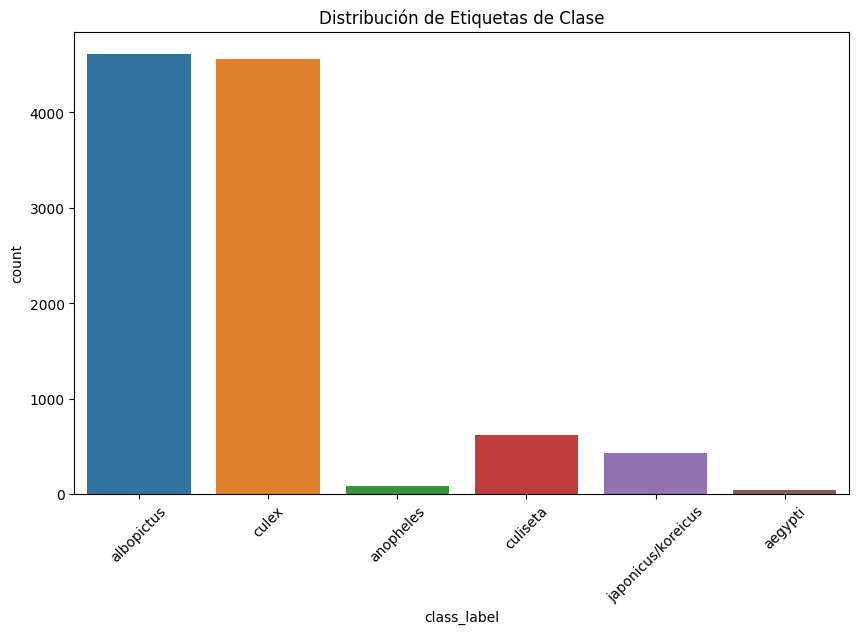

In [20]:
# Contar las etiquetas de clase únicas
class_counts = data['class_label'].value_counts()
print(class_counts)

# Visualizar la distribución de las etiquetas de clase
plt.figure(figsize=(10, 6))
sns.countplot(x='class_label', data=data)
plt.title('Distribución de Etiquetas de Clase')
plt.xticks(rotation=45)
plt.show()

Como se puede observar se tiene una mayor presencia de imágenes con la clase albociptus y culex. Mientras que aegypti y anopheles predominan menos. Por ende es posible que se necesite usar alguna técnica de optimización como data augmentation antes de crear el modelo. 

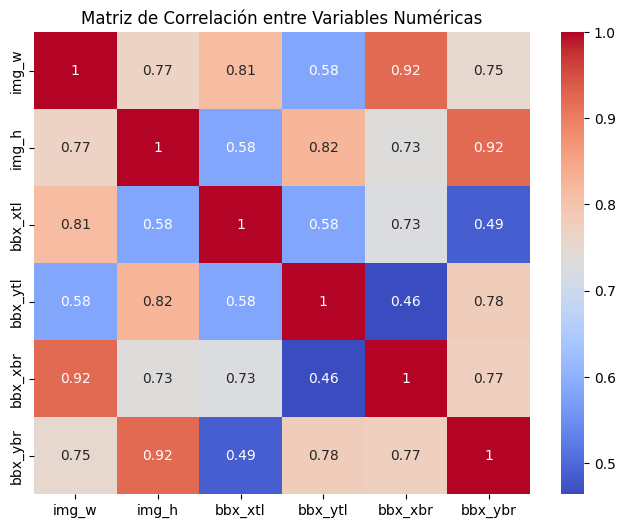

In [21]:
# Visualizar la correlación entre las variables numéricas
# Filtrar solo las columnas numéricas
numeric_columns = ['img_w', 'img_h', 'bbx_xtl', 'bbx_ytl', 'bbx_xbr', 'bbx_ybr']
numeric_data = data[numeric_columns]

# Calcular la matriz de correlación entre variables numéricas
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


In [28]:
# Encontrar las variables con mayor correlación
corr_threshold = 0.7  # Puedes ajustar este umbral según tus necesidades
highly_correlated_pairs = []

for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > corr_threshold:
            pair = (numeric_columns[i], numeric_columns[j], correlation)
            highly_correlated_pairs.append(pair)

# Ordenar los pares de mayor a menor correlación absoluta
highly_correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Imprimir los pares de variables altamente correlacionadas
for pair in highly_correlated_pairs:
    var1, var2, corr = pair
    print(f"{var1} - {var2}: Correlación = {corr:.2f}")


img_w - bbx_xbr: Correlación = 0.92
img_h - bbx_ybr: Correlación = 0.92
img_h - bbx_ytl: Correlación = 0.82
img_w - bbx_xtl: Correlación = 0.81
bbx_ytl - bbx_ybr: Correlación = 0.78
bbx_xbr - bbx_ybr: Correlación = 0.77
img_w - img_h: Correlación = 0.77
img_w - bbx_ybr: Correlación = 0.75
img_h - bbx_xbr: Correlación = 0.73
bbx_xtl - bbx_xbr: Correlación = 0.73


Las correlaciones encontradas en la matriz de correlación entre las variables numéricas son las siguientes:

1. img_w (ancho de la imagen) tiene una correlación muy alta de 0.92 con bbx_xbr (coordenada x del punto inferior derecho del cuadro delimitador).

2. img_h (altura de la imagen) también tiene una correlación muy alta de 0.92 con bbx_ybr (coordenada y del punto inferior derecho del cuadro delimitador).

3. img_h muestra una correlación significativa de 0.82 con bbx_ytl (coordenada y del punto superior izquierdo del cuadro delimitador).

3. img_w presenta una correlación notable de 0.81 con bbx_xtl (coordenada x del punto superior izquierdo del cuadro delimitador).

4. bbx_ytl y bbx_ybr tienen una correlación de 0.78, lo que indica cierta relación en las coordenadas y del punto superior izquierdo e inferior derecho del cuadro delimitador.

5. bbx_xbr y bbx_ybr tienen una correlación de 0.77, lo que sugiere una relación entre las coordenadas x e y del punto inferior derecho del cuadro delimitador.

6. img_w y img_h tienen una correlación de 0.77, lo que podría indicar que las imágenes tienden a mantener una cierta relación de aspecto.

7. img_w muestra una correlación de 0.75 con bbx_ybr, lo que también sugiere cierta relación entre el ancho de la imagen y la coordenada y del punto inferior derecho del cuadro delimitador.

8. img_h tiene una correlación de 0.73 con bbx_xbr, lo que indica una relación entre la altura de la imagen y la coordenada x del punto inferior derecho del cuadro delimitador.

9. bbx_xtl y bbx_xbr tienen una correlación de 0.73, lo que sugiere una relación en las coordenadas x del punto superior izquierdo e inferior derecho del cuadro delimitador.

En resumen, se puede observar correlaciones significativas ya que las coordenadas de los cuadros delimitadores (bounding boxes) en las imágenes estan relacionadas con las dimensiones de las propias imágenes. 

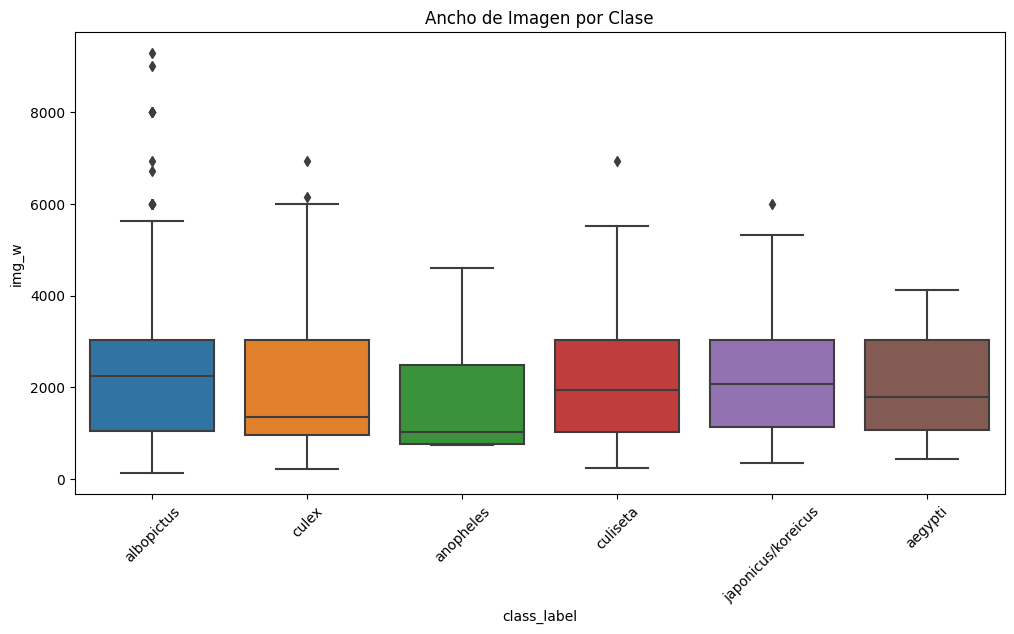

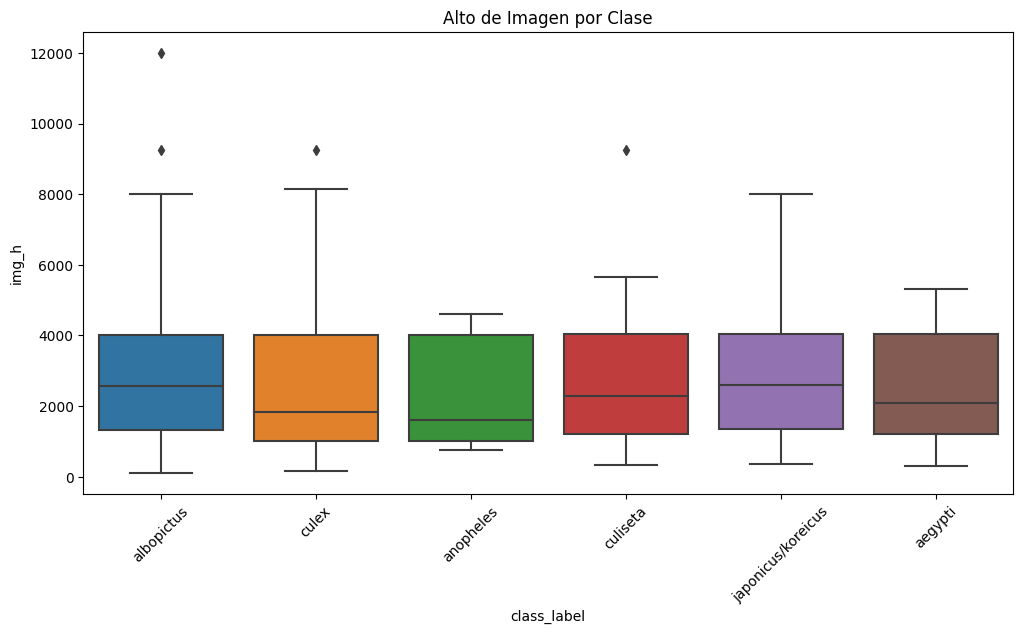

In [45]:
# Visualizar las dimensiones de las imágenes por clase usando boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='class_label', y='img_w', data=data)
plt.title('Ancho de Imagen por Clase')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='class_label', y='img_h', data=data)
plt.title('Alto de Imagen por Clase')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Alto Promedio de Imagen por Clase')

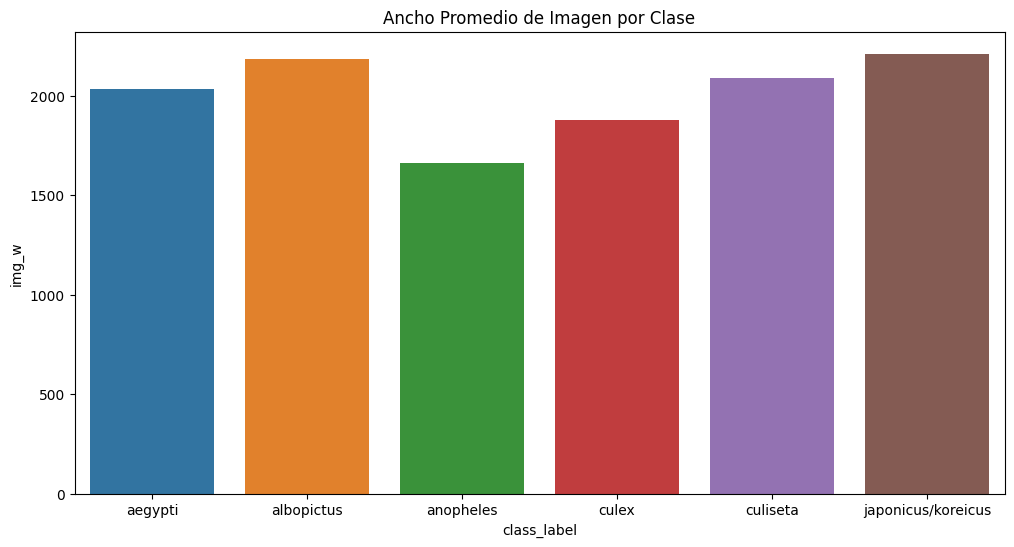

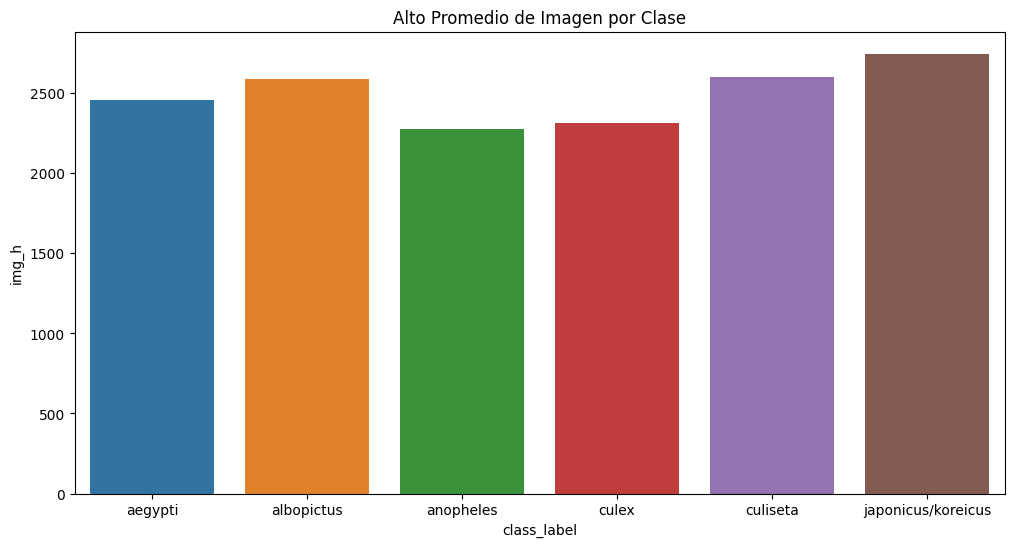

In [36]:
# Calcular la media del ancho de las imágenes por clase
mean_width_by_class = data.groupby('class_label')['img_w'].mean().reset_index()

# Calcular la media del alto de las imágenes por clase
mean_height_by_class = data.groupby('class_label')['img_h'].mean().reset_index()

# Visualizar las medias del ancho y alto de las imágenes por clase
plt.figure(figsize=(12, 6))
sns.barplot(x='class_label', y='img_w', data=mean_width_by_class)
plt.title('Ancho Promedio de Imagen por Clase')

plt.figure(figsize=(12, 6))
sns.barplot(x='class_label', y='img_h', data=mean_height_by_class)
plt.title('Alto Promedio de Imagen por Clase')


Como se puede observar, se muestran variaciones entre el ancho y largo de la imágenes en diferentes clases de mosquito. Asimismo en la clase albobictus se muestran imágenes con dimensiones atípicas. La mayoría de las CNNs requieren que todas las imágenes de entrada tengan las mismas dimensiones. Esto se debe a que las capas convolucionales y de agrupación (pooling) están diseñadas para operar con ventanas tamaño fijo. Como se tienen imágenes de diferentes dimensiones, se deberan redimensionarlas para que todas coincidan. 